## **케라스 함수형 API**

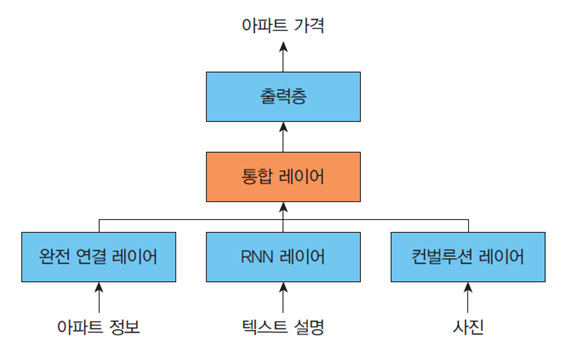

### **준비 사항: 패키지 불러오기**

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras import layers
import numpy as np

### **데이터셋 불러오기 및 데이터셋 탐색**

MNIST 데이터베이스 (Modified National Institute of Standards and Technology database): 손으로 쓴 숫자들로 이루어진 대형 데이터베이스

In [28]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [29]:
X_train = X_train.reshape(60000, 784).astype('float32') / 255
X_test = X_test.reshape(10000, 784).astype('float32') / 255

In [ ]:
#X_train, X_test =X_train/255, X_test/255 

In [ ]:
# model = Sequential()
# model.add(Dense(128, input_dim=28*28, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(784, activation='softmax'))

In [ ]:
temp = x()
temp()

In [40]:
inputs = keras.Input(shape=(784,))
encoded =layers.Dense(32, activation='relu')(inputs)
latent_space =layers.Dense(36, activation='relu')(encoded)
decoded =layers.Dense(784, activation='sigmoid')(latent_space)

latent_model = Model(inputs=inputs, outputs=latent_space)

autoencoder = Model(inputs=inputs, outputs=decoded)

In [41]:
autoencoder.compile(optimizer=keras.optimizers.Adam(), loss='mse')

In [42]:
autoencoder.fit(X_train, X_train, epochs=10, batch_size=256, verbose=2, shuffle=True,)

Epoch 1/10
235/235 - 1s - loss: 0.0709 - 1s/epoch - 5ms/step
Epoch 2/10
235/235 - 1s - loss: 0.0371 - 793ms/epoch - 3ms/step
Epoch 3/10
235/235 - 1s - loss: 0.0299 - 805ms/epoch - 3ms/step
Epoch 4/10
235/235 - 1s - loss: 0.0253 - 854ms/epoch - 4ms/step
Epoch 5/10
235/235 - 1s - loss: 0.0217 - 807ms/epoch - 3ms/step
Epoch 6/10
235/235 - 1s - loss: 0.0198 - 758ms/epoch - 3ms/step
Epoch 7/10
235/235 - 1s - loss: 0.0186 - 839ms/epoch - 4ms/step
Epoch 8/10
235/235 - 1s - loss: 0.0178 - 791ms/epoch - 3ms/step
Epoch 9/10
235/235 - 1s - loss: 0.0171 - 802ms/epoch - 3ms/step
Epoch 10/10
235/235 - 1s - loss: 0.0165 - 812ms/epoch - 3ms/step


### **Generative Images**

In [43]:
latent_imgs = latent_model.predict(X_test)
latent_imgs

313/313 [==============================] - 0s 749us/step


array([[12.083347 ,  2.3749797, 14.814846 , ...,  7.1847963,  0.       ,
         0.       ],
       [13.613075 ,  9.693176 ,  6.7561693, ..., 10.631516 ,  9.805498 ,
         0.       ],
       [ 9.470942 ,  2.0289917,  5.9487305, ...,  7.6640115,  4.625508 ,
         0.       ],
       ...,
       [11.268774 ,  3.1433082, 18.363258 , ..., 11.070471 , 16.823677 ,
         0.       ],
       [12.391122 ,  1.9889082,  5.9432344, ..., 17.275688 ,  5.8315015,
         0.       ],
       [20.06032  ,  6.144638 , 14.553455 , ..., 22.12078  , 25.898075 ,
         0.       ]], dtype=float32)

313/313 [==============================] - 0s 1ms/step


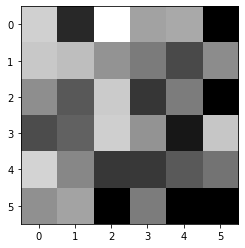

In [46]:
latent_imgs = latent_model.predict(X_test)

import matplotlib.pyplot as plt
plt.imshow(latent_imgs[0].reshape(6, 6), cmap='gray')


313/313 [==============================] - 0s 870us/step


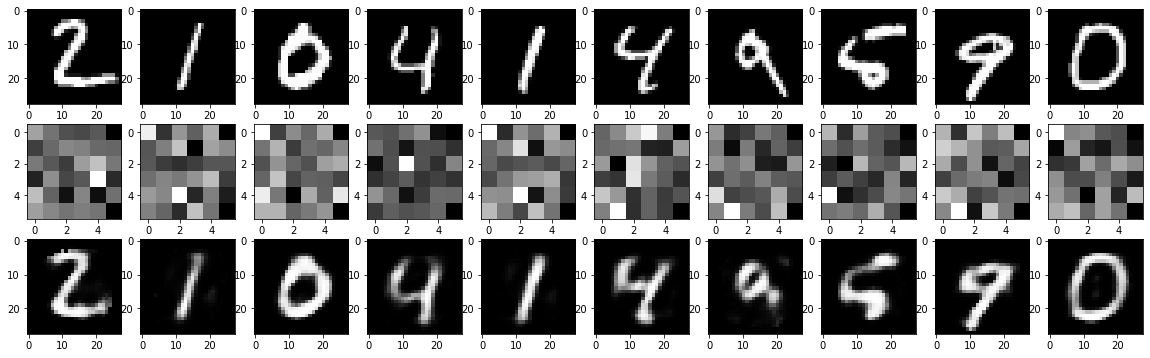

In [49]:
import matplotlib.pyplot as plt

latent_imgs = latent_model.predict(X_test)
decoded_imgs = autoencoder.predict(X_test)

n = 10
plt.figure(figsize=(20, 6))
for i in range(1, n+1):
  ax = plt.subplot(3, n, i)
  plt.imshow(X_test[i].reshape(28, 28), cmap='gray')

  ax = plt.subplot(3, n, i+n)
  plt.imshow(latent_imgs[i].reshape(6, 6), cmap='gray')

  ax = plt.subplot(3, n, i+n*2)
  plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')

plt.show()